In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime as dt

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('AAPL.csv', sep = ',')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.961916,691992000
1,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.971795,1096810400
2,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.980306,680433600
3,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.981067,705555200
4,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.052499,2227450400


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
print(type(df['Date'][0]))
print(type(df['Open'][0]))
print(type(df['Close'][0]))
print(type(df['High'][0]))
print(type(df['Low'][0]))

<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.961916,691992000
1,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.971795,1096810400
2,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.980306,680433600
3,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.981067,705555200
4,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.052499,2227450400


In [8]:
df.shape

(4616, 7)

In [9]:
df_close = df[['Date','Close']]
df_close.head()

,Date,Close
0,2005-01-03,1.130179
1,2005-01-04,1.141786
2,2005-01-05,1.151786
3,2005-01-06,1.152679
4,2005-01-07,1.236607


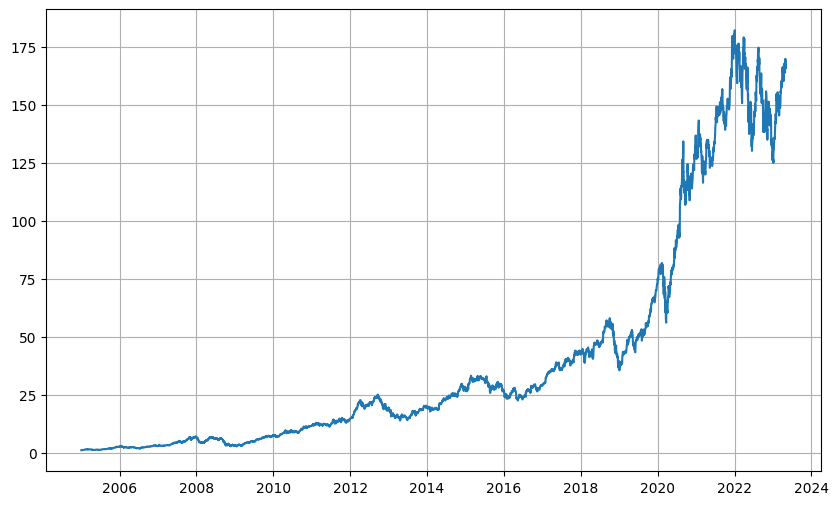

In [10]:
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel = 'Date'
plt.ylabel = 'AAPL Close price'
plt.plot(df_close['Date'],df_close['Close'])
plt.show()

In [11]:
close = df_close['Close']
scaler = MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close).reshape(-1,1))

In [12]:
training_size=int(len(closedf)*0.90)
test_size=len(closedf)-training_size
train_data,test_data=closedf[:training_size,:],closedf[training_size:,:1]

In [13]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (4138, 15)
y_train:  (4138,)
X_test:  (446, 15)
y_test (446,)


In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {'C':[0.01,1,10,50,100],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0.01,0.1,0.5,1]}

In [17]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [18]:
#grid.fit(X_train,y_train)

In [19]:
#grid.best_params_

In [20]:
svr_best_model = SVR(kernel = 'linear', C = 50, epsilon = 0.001, gamma = 'scale', degree = 2)

In [21]:
svr_best_model

SVR(C=50, degree=2, epsilon=0.001, kernel='linear')

In [22]:
svr_best_model.fit(X_train, y_train)

SVR(C=50, degree=2, epsilon=0.001, kernel='linear')

In [23]:
train_predict=svr_best_model.predict(X_train)
test_predict=svr_best_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (4138, 1)
Test data prediction: (446, 1)


In [24]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [25]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))

Train data RMSE:  0.8329455580983066
Train data MSE:  0.6937983027556995
-------------------------------------------------------------------------------------
Test data RMSE:  2.96081192866453
Test data MSE:  8.766407276922173


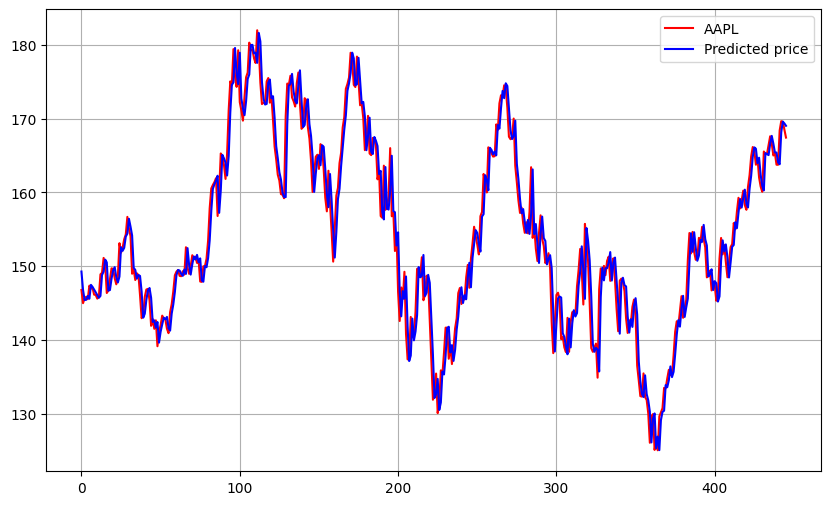

In [31]:
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel = 'Date'
plt.ylabel = 'AAPL Close price'
plt.plot(original_ytest, c = 'red', label = 'AAPL')
plt.plot(test_predict, c = 'blue', label = 'Predicted price')
plt.legend()
plt.show()
